# Important Setup

In [12]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
from import_src import import_src
import_src()

Append /home/tungpth/MLOpsVN/src to sys.path


# Code

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os
import json
from plotly import express as px

In [15]:
SRC_DIR = '../../data/raw_data/phase-2/prob-2'

In [16]:
df = pd.read_parquet(os.path.join(SRC_DIR, 'raw_train.parquet'))
df

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,label
0,0.041847,tcp,-,FIN,38.0,40.0,2438.0,19266.0,31.0,29.0,...,1.0,1.0,1.0,0.0,0.0,0.0,2.0,11.0,0.0,Normal
1,1.089133,tcp,http,FIN,14.0,18.0,1684.0,10168.0,31.0,29.0,...,1.0,1.0,2.0,0.0,0.0,1.0,2.0,1.0,0.0,Normal
2,0.000002,udp,dns,INT,2.0,0.0,114.0,0.0,254.0,0.0,...,17.0,17.0,25.0,0.0,0.0,0.0,17.0,25.0,0.0,Other
3,1.467246,tcp,ftp,FIN,12.0,12.0,2618.0,682.0,254.0,252.0,...,1.0,1.0,3.0,0.0,0.0,0.0,2.0,3.0,0.0,Denial of Service
4,0.000927,udp,dns,CON,2.0,2.0,130.0,162.0,31.0,29.0,...,1.0,1.0,2.0,0.0,0.0,0.0,1.0,4.0,0.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61836,1.751882,tcp,smtp,FIN,52.0,40.0,37232.0,3276.0,31.0,29.0,...,1.0,1.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,Normal
61837,0.929489,tcp,-,FIN,10.0,10.0,608.0,646.0,254.0,252.0,...,3.0,3.0,3.0,0.0,0.0,0.0,3.0,3.0,0.0,Exploits
61838,0.000008,udp,dns,INT,2.0,0.0,114.0,0.0,254.0,0.0,...,41.0,20.0,51.0,0.0,0.0,0.0,41.0,51.0,0.0,Other
61839,0.000009,unas,-,INT,2.0,0.0,200.0,0.0,254.0,0.0,...,1.0,1.0,5.0,0.0,0.0,0.0,3.0,5.0,0.0,Information Gathering


In [17]:
feature_config = json.load(open(os.path.join(SRC_DIR, 'features_config.json')))
feature_config

{'numeric_columns': ['feature1',
  'feature5',
  'feature6',
  'feature7',
  'feature8',
  'feature9',
  'feature10',
  'feature11',
  'feature12',
  'feature13',
  'feature14',
  'feature15',
  'feature16',
  'feature17',
  'feature18',
  'feature19',
  'feature20',
  'feature21',
  'feature22',
  'feature23',
  'feature24',
  'feature25',
  'feature26',
  'feature27',
  'feature28',
  'feature29',
  'feature30',
  'feature31',
  'feature32',
  'feature33',
  'feature34',
  'feature35',
  'feature36',
  'feature37',
  'feature38',
  'feature39',
  'feature40',
  'feature41'],
 'category_columns': ['feature2', 'feature3', 'feature4'],
 'target_column': 'label',
 'ml_type': 'classification'}

In [18]:
df.describe()

,feature1,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,...,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41
count,61841.000000,61841.000000,61841.000000,6.184100e+04,6.184100e+04,61841.000000,61841.000000,6.184100e+04,6.184100e+04,61841.000000,...,61841.000000,61841.000000,61841.000000,61841.000000,61841.000000,61841.000000,61841.000000,61841.000000,61841.000000,61841.000000
mean,1.250073,19.465807,18.423861,8.226342e+03,1.441983e+04,179.952928,85.024143,7.070748e+07,6.558390e+05,4.753917,...,6.008748,5.198444,4.000695,8.282903,0.011707,0.011740,0.135024,6.779014,9.072686,0.013890
std,6.007840,132.296120,111.606639,1.692162e+05,1.460897e+05,102.457260,112.857080,1.861274e+08,2.404171e+06,63.735223,...,8.135456,8.124992,5.807060,11.094503,0.109503,0.109942,0.717736,8.377309,10.856346,0.117037
min,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,62.000000,0.000000,1.235795e+04,0.000000e+00,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000
50%,0.004414,4.000000,2.000000,5.280000e+02,1.780000e+02,254.000000,29.000000,7.376624e+05,1.777086e+03,0.000000,...,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000
75%,0.685279,12.000000,10.000000,1.392000e+03,1.072000e+03,254.000000,252.000000,8.000000e+07,2.283193e+04,3.000000,...,6.000000,4.000000,3.000000,8.000000,0.000000,0.000000,0.000000,8.000000,11.000000,0.000000
max,59.999935,10646.000000,10872.000000,1.435577e+07,1.459086e+07,255.000000,254.000000,5.468000e+09,2.242273e+07,5319.000000,...,59.000000,59.000000,46.000000,63.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61841 entries, 0 to 61840
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   61841 non-null  float64
 1   feature2   61841 non-null  object 
 2   feature3   61841 non-null  object 
 3   feature4   61841 non-null  object 
 4   feature5   61841 non-null  float64
 5   feature6   61841 non-null  float64
 6   feature7   61841 non-null  float64
 7   feature8   61841 non-null  float64
 8   feature9   61841 non-null  float64
 9   feature10  61841 non-null  float64
 10  feature11  61841 non-null  float64
 11  feature12  61841 non-null  float64
 12  feature13  61841 non-null  float64
 13  feature14  61841 non-null  float64
 14  feature15  61841 non-null  float64
 15  feature16  61841 non-null  float64
 16  feature17  61841 non-null  float64
 17  feature18  61841 non-null  float64
 18  feature19  61841 non-null  float64
 19  feature20  61841 non-null  float64
 20  featur

In [20]:
df_numeric = df[feature_config['numeric_columns']]
df_categorical = df[feature_config['category_columns']]
series_label = df['label']

# Univariate

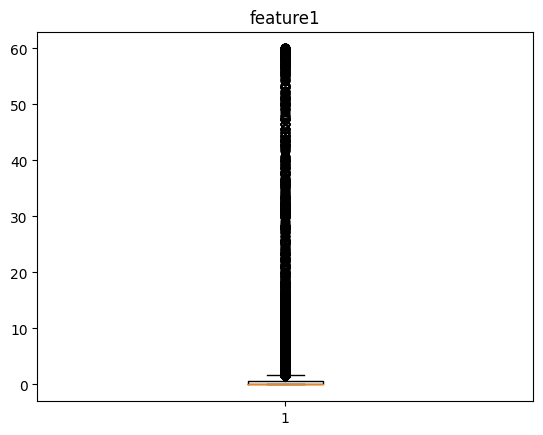

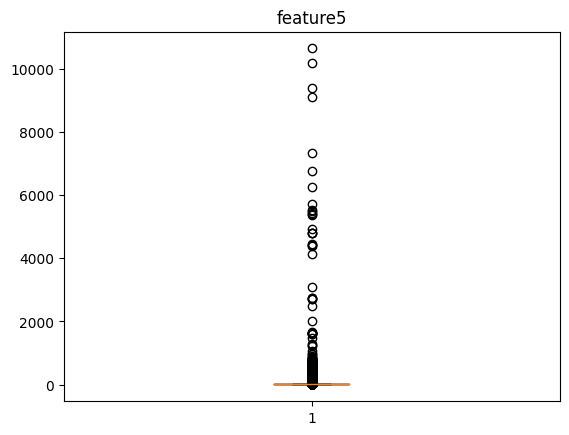

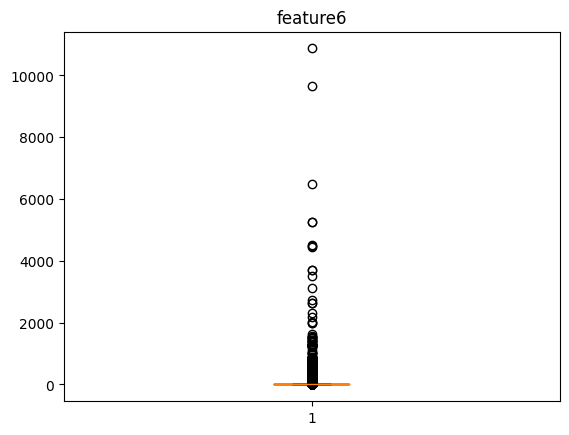

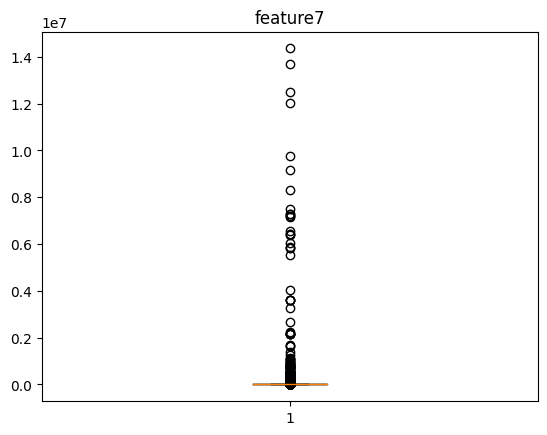

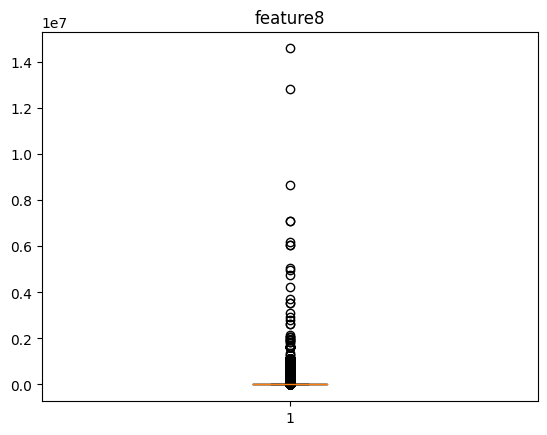

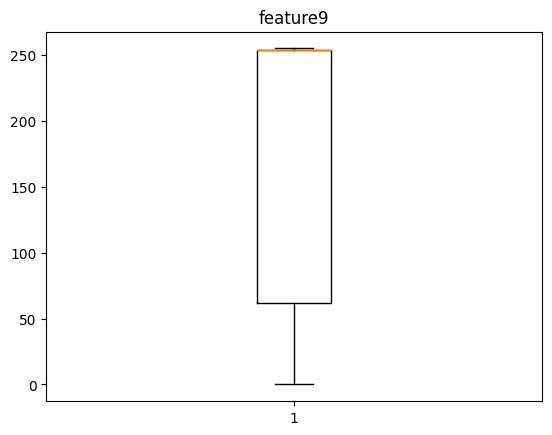

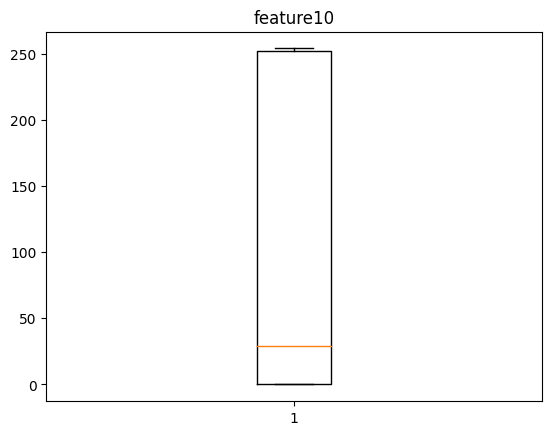

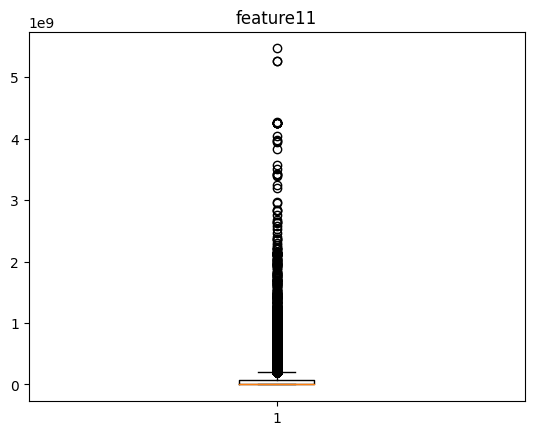

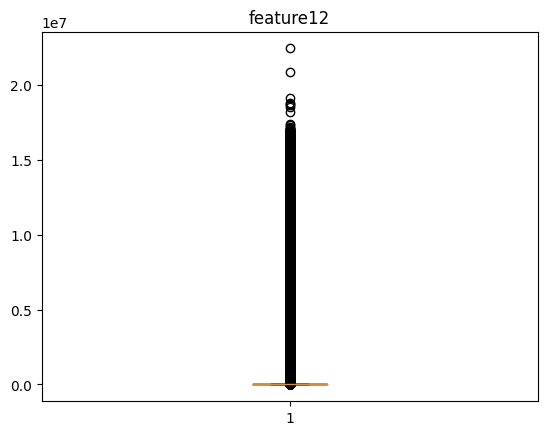

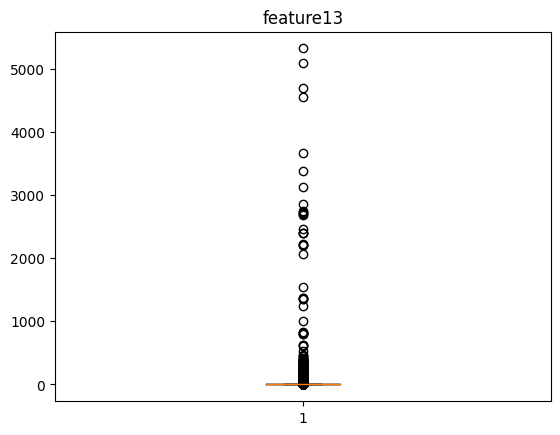

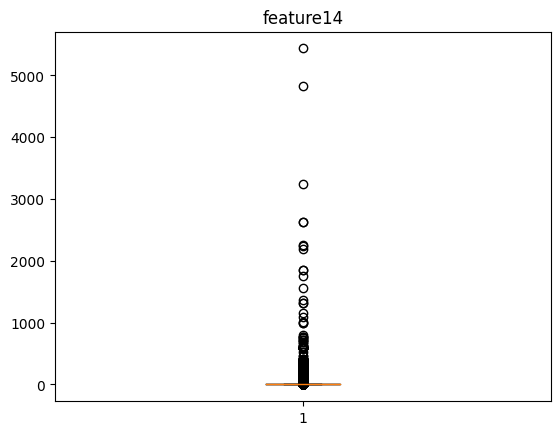

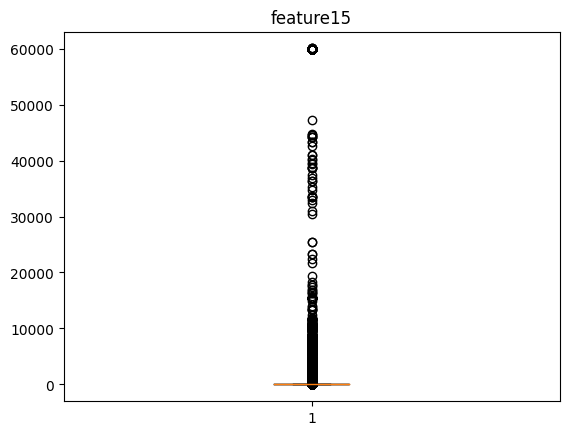

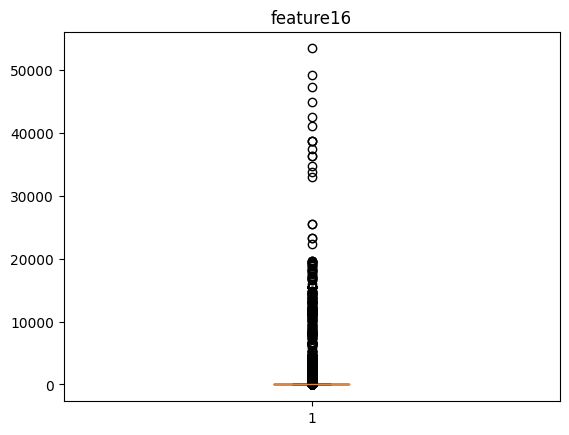

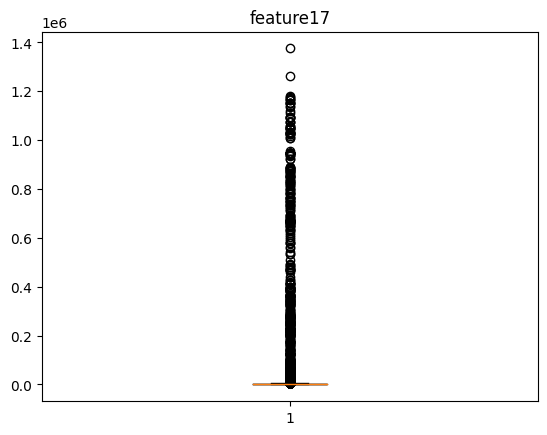

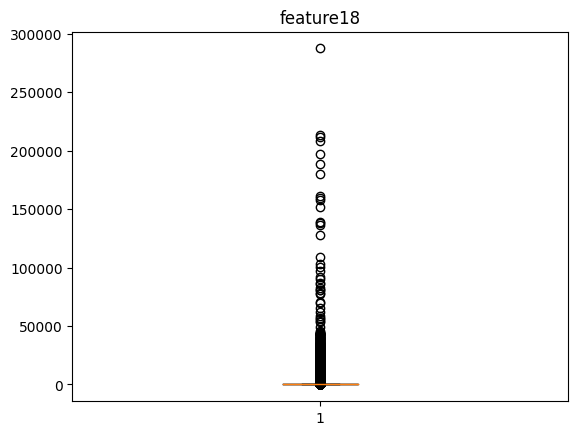

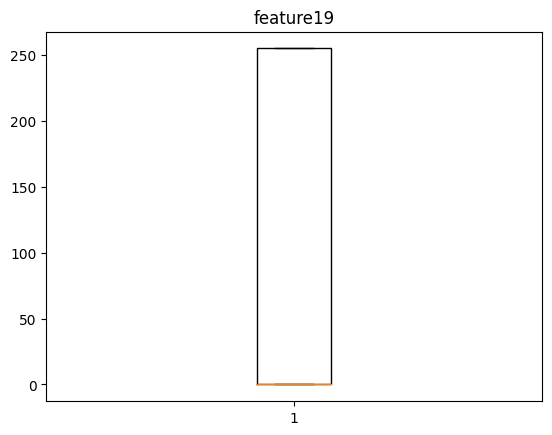

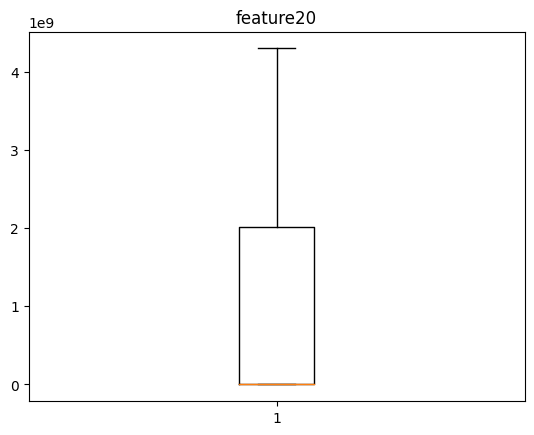

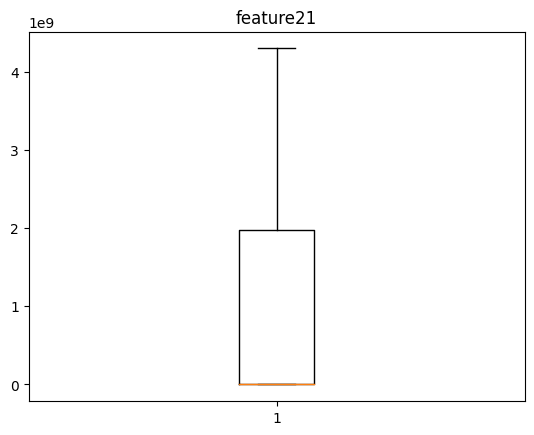

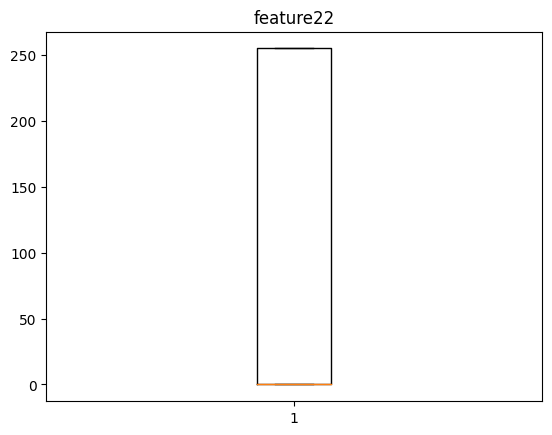

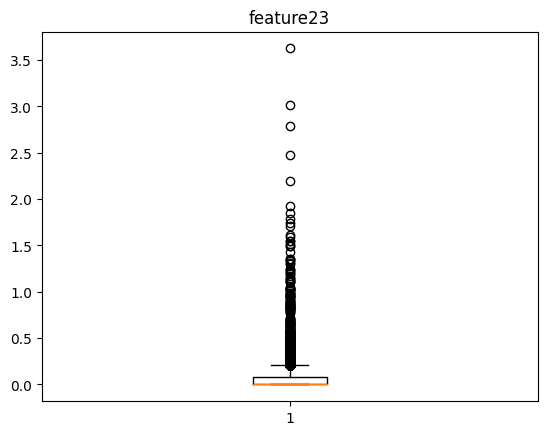

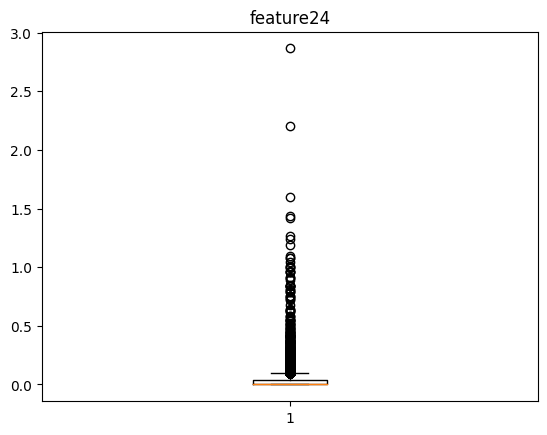

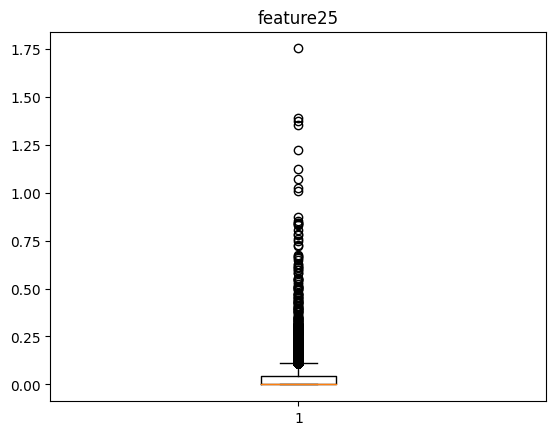

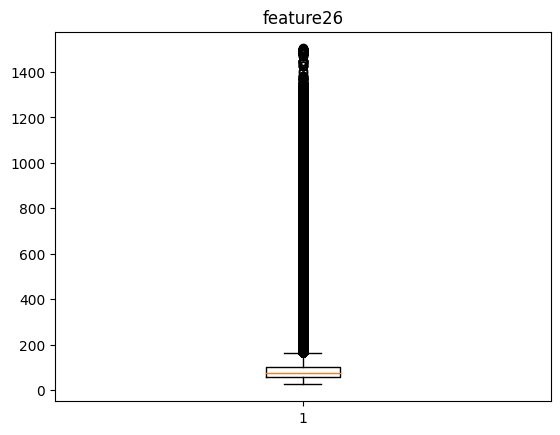

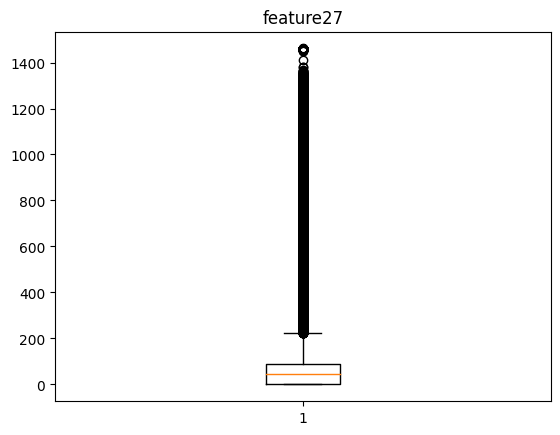

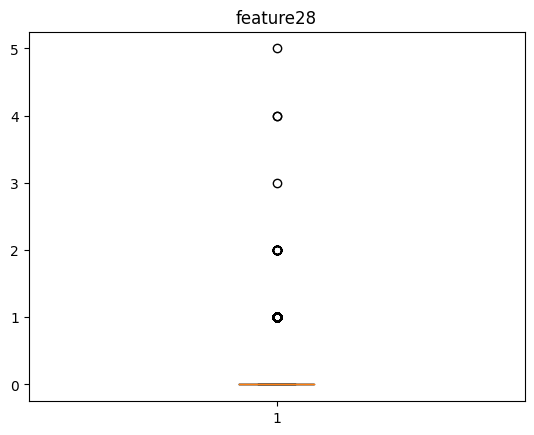

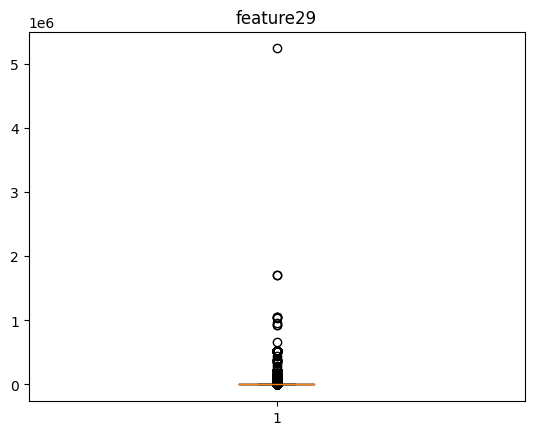

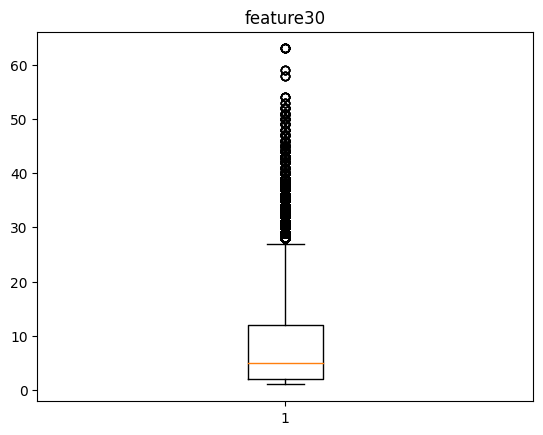

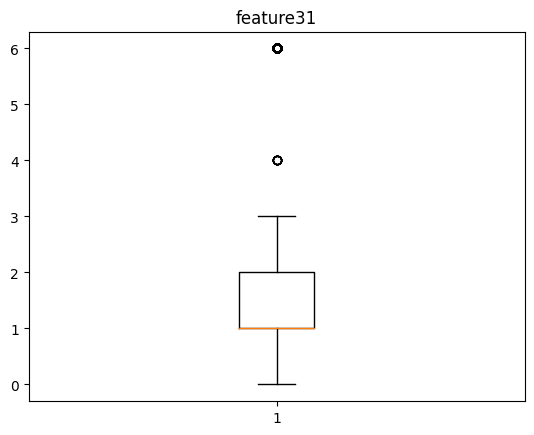

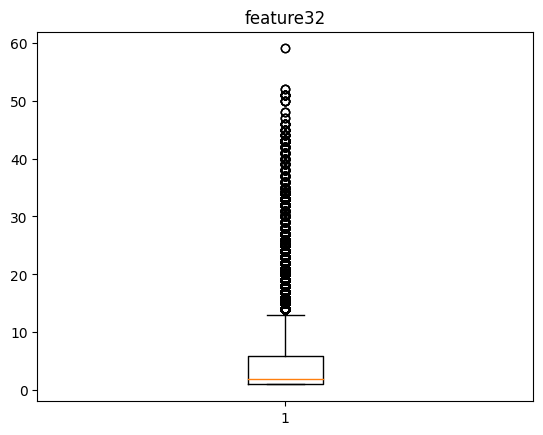

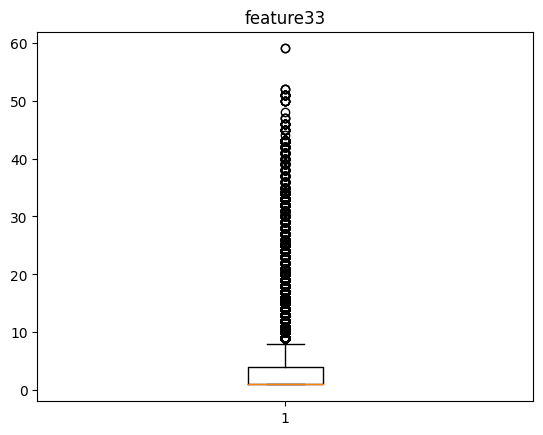

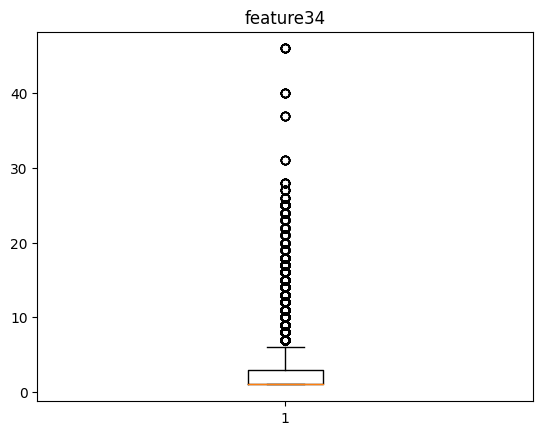

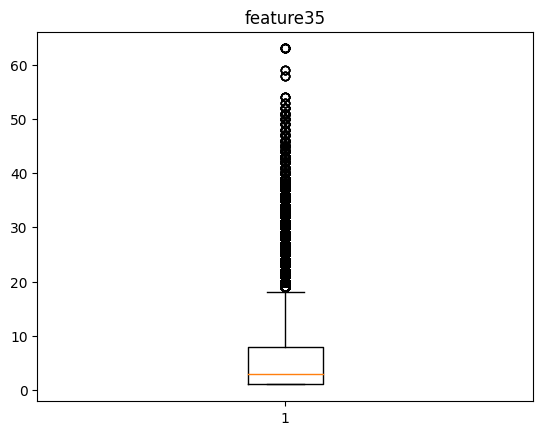

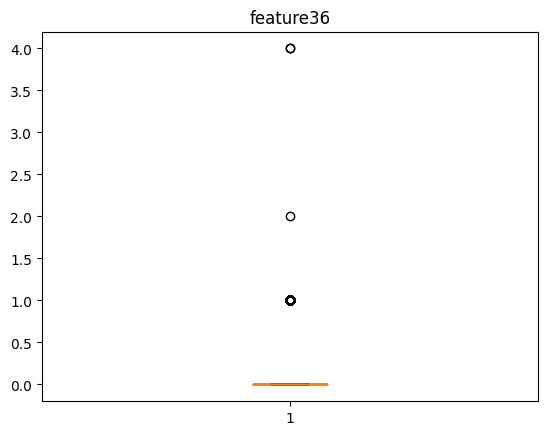

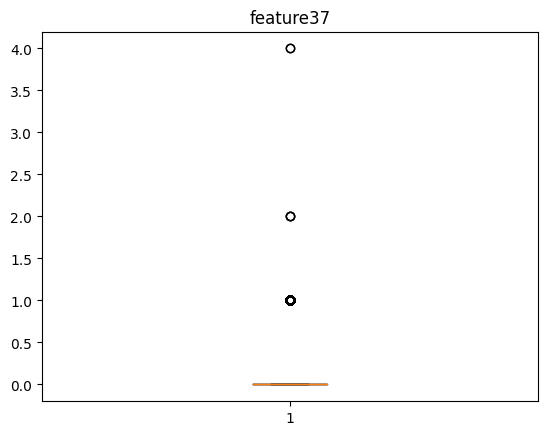

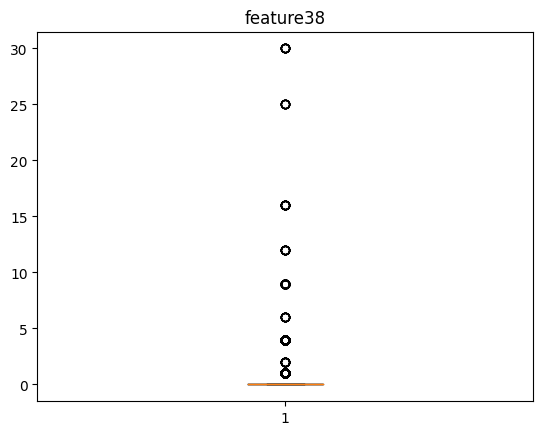

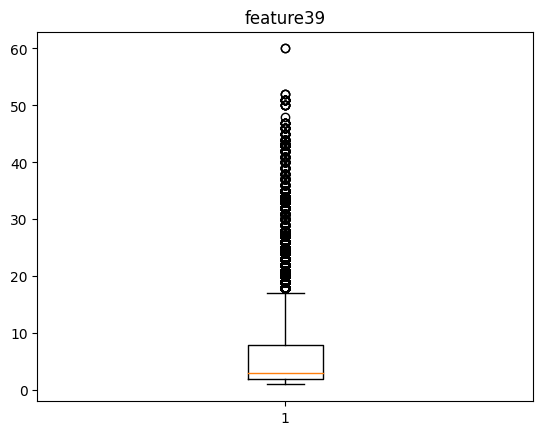

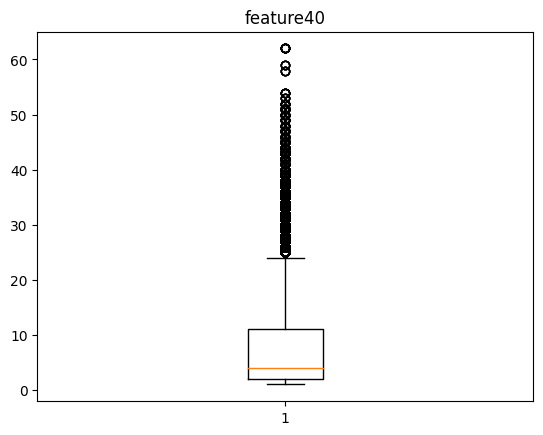

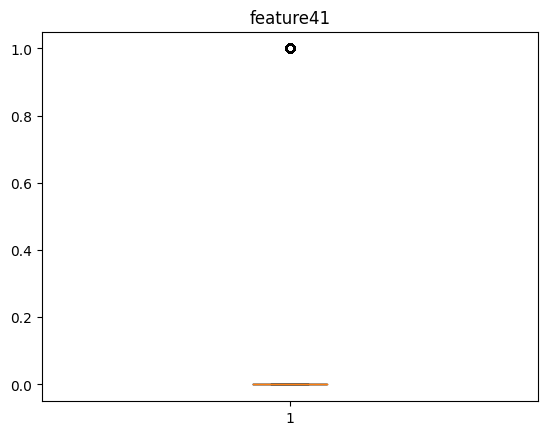

In [22]:
for col in df_numeric.columns:
    # sns.histplot(df_numeric[col])
    # plt.show()
    plt.boxplot(df_numeric[col])
    plt.title(col)
    plt.show()

In [23]:
for col in df_categorical.columns:
    display(df_categorical[col].value_counts())

feature2
tcp       29587
udp       22189
unas       3754
arp         888
ospf        802
          ...  
idrp         22
isis         22
netblt       22
igmp          5
icmp          3
Name: count, Length: 132, dtype: int64

feature3
-           34063
dns         16321
http         6540
smtp         1707
ftp-data     1260
ftp          1128
pop3          380
ssh           346
dhcp           38
ssl            23
snmp           21
irc             8
radius          6
Name: count, dtype: int64

feature4
FIN    28165
INT    27882
CON     4848
REQ      922
RST       20
ECO        3
ACC        1
Name: count, dtype: int64

=> Gop Category

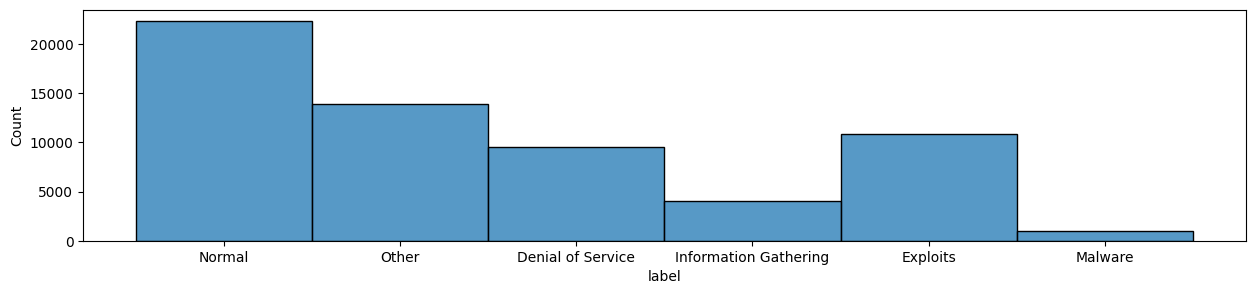

In [35]:
plt.figure(figsize=(15,3))
sns.histplot(series_label)
plt.show()

In [27]:
series_label.value_counts()

label
Normal                   22390
Other                    13963
Exploits                 10864
Denial of Service         9585
Information Gathering     4081
Malware                    958
Name: count, dtype: int64

# Bi-variate

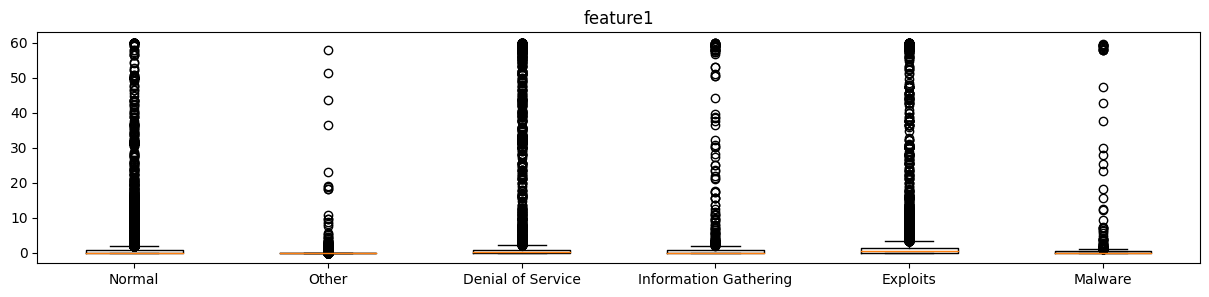

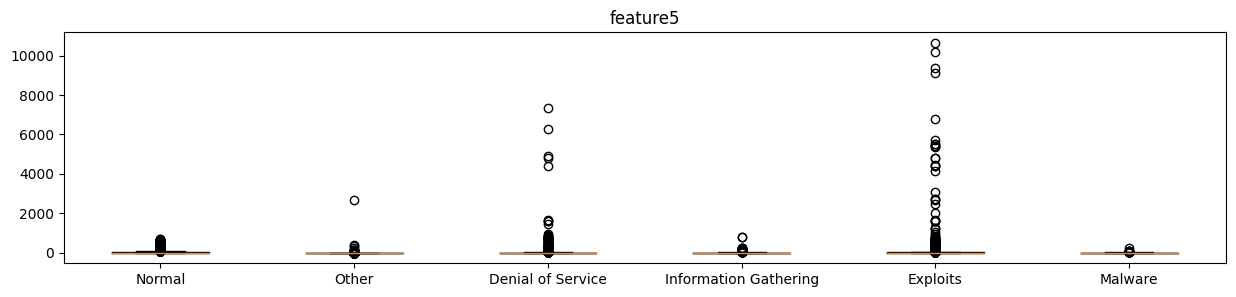

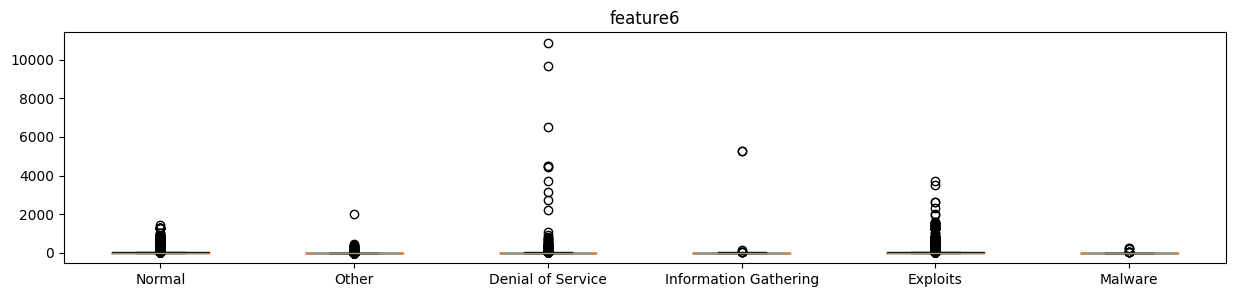

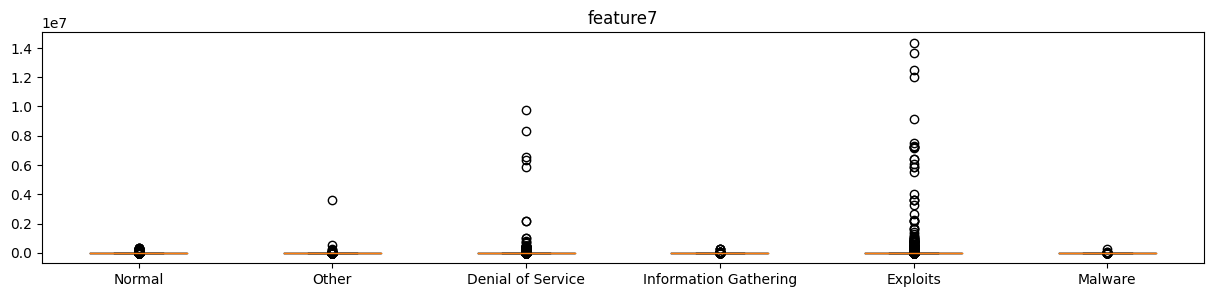

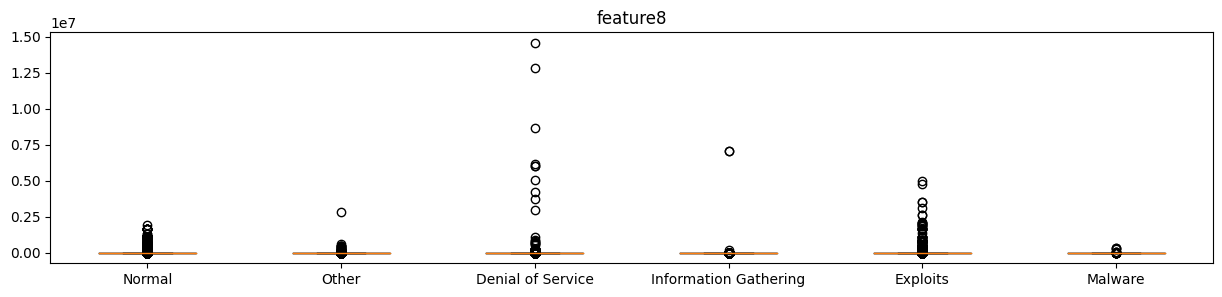

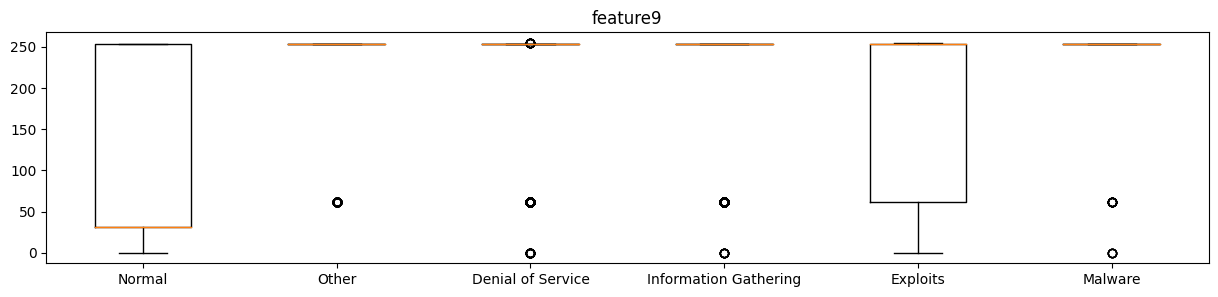

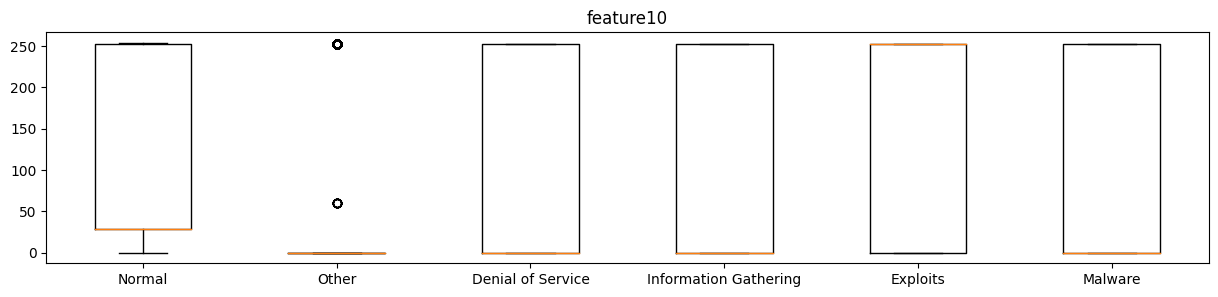

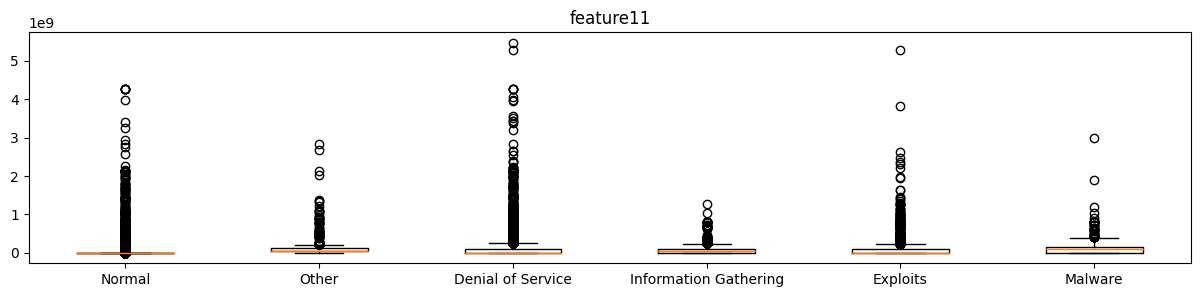

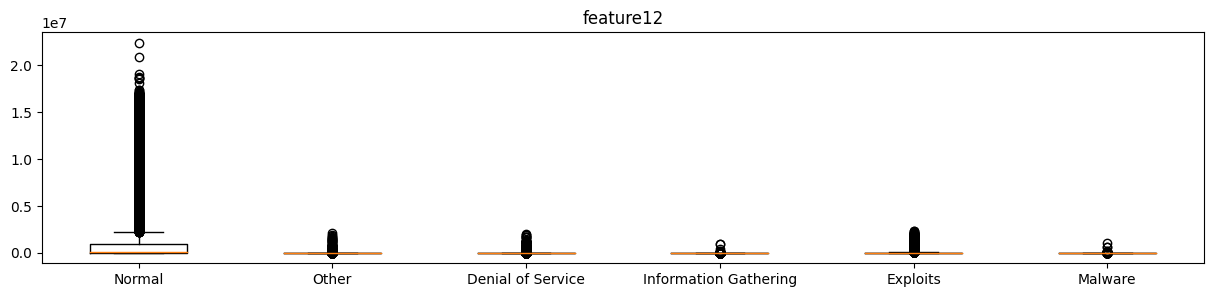

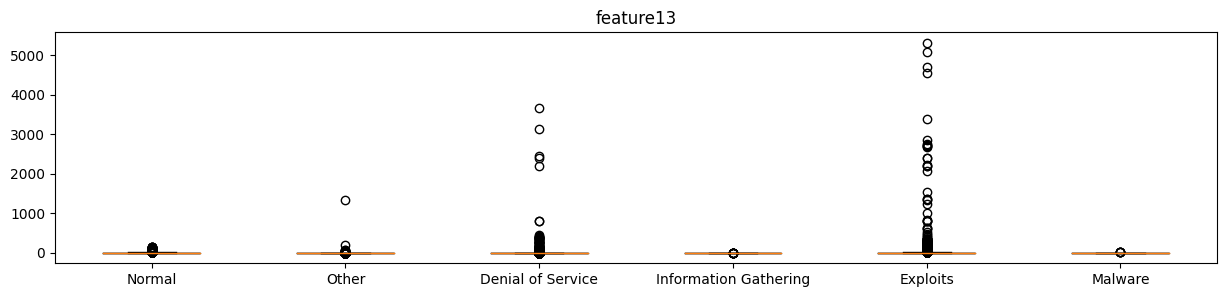

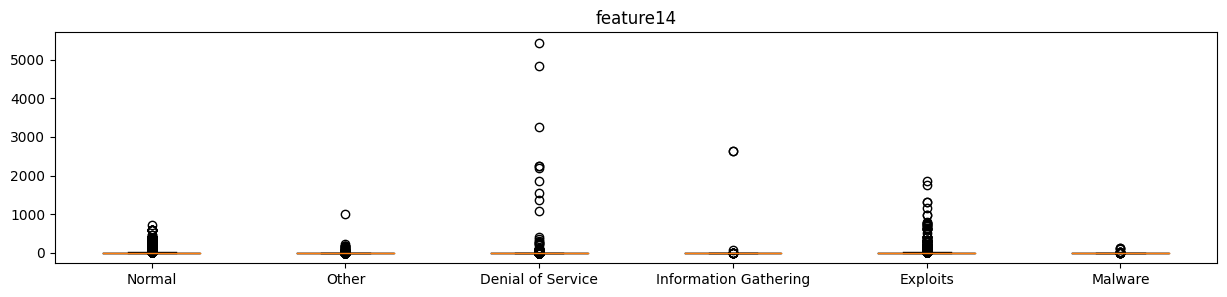

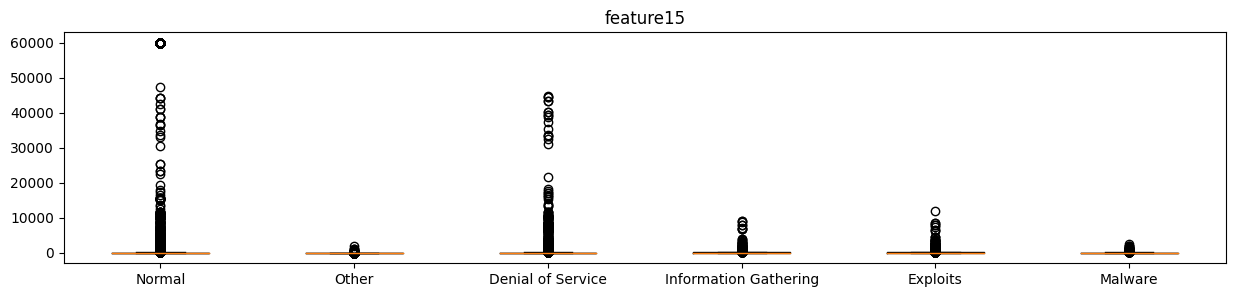

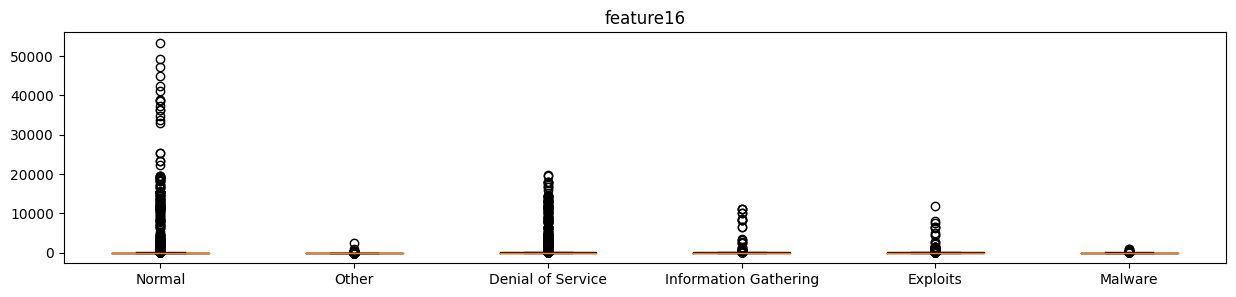

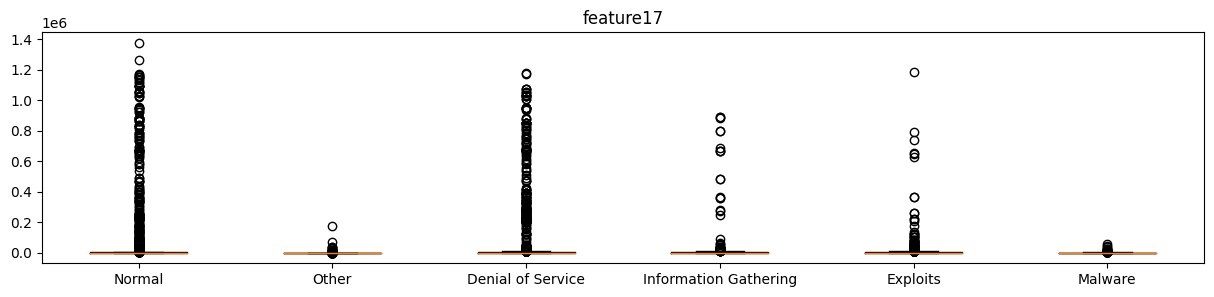

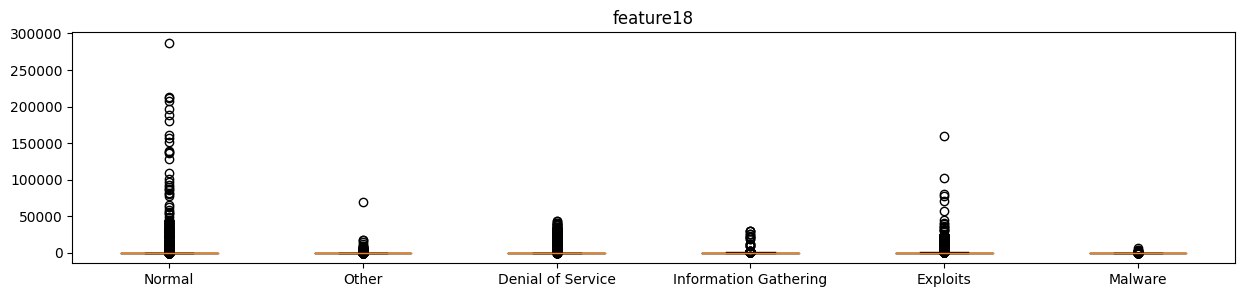

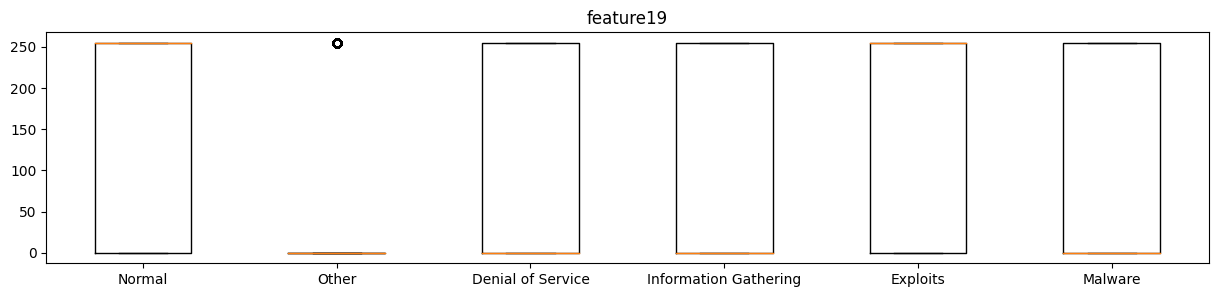

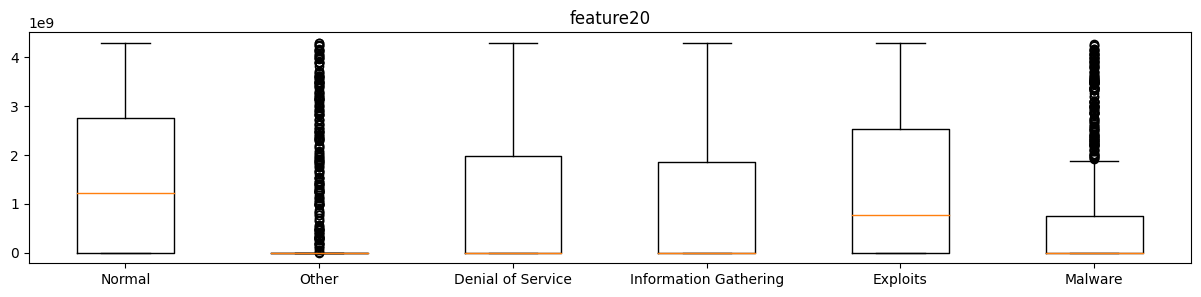

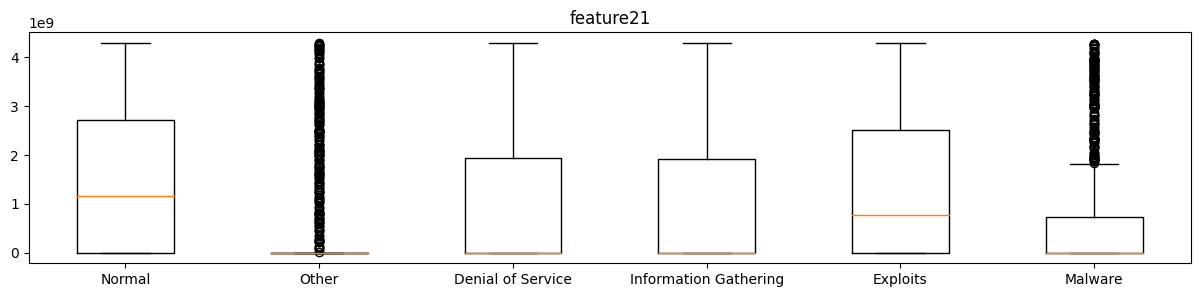

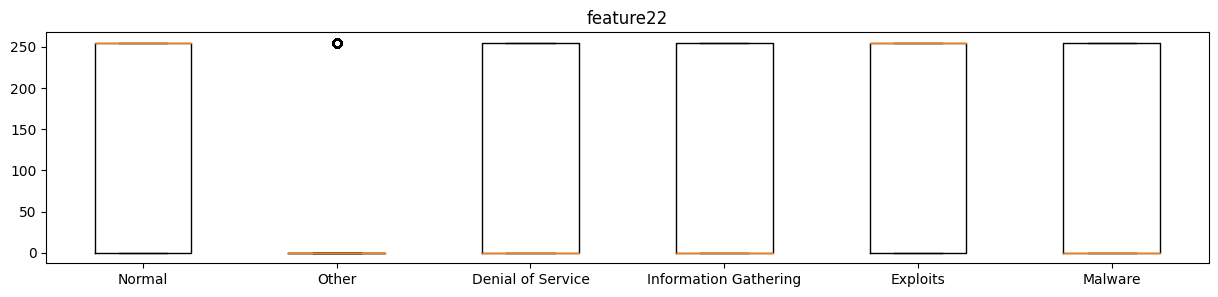

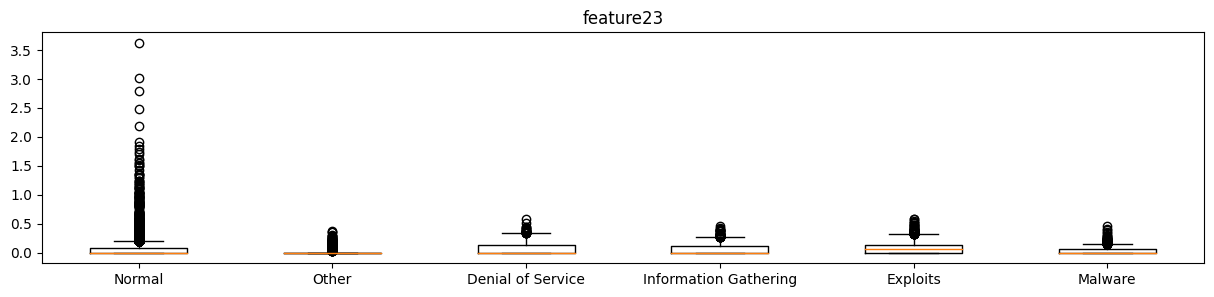

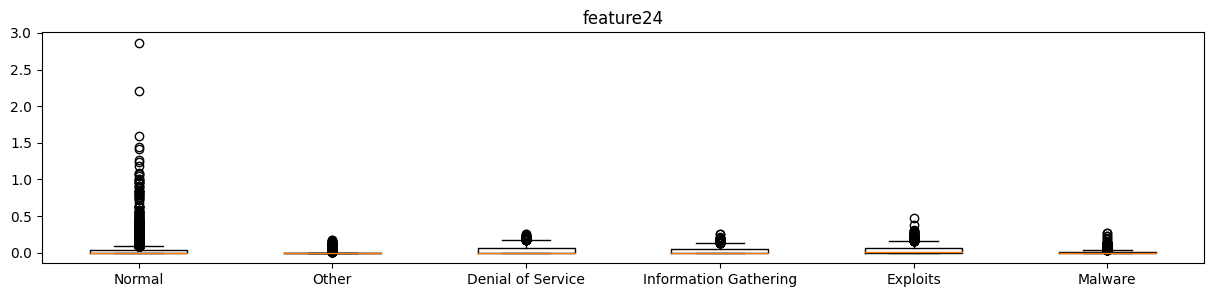

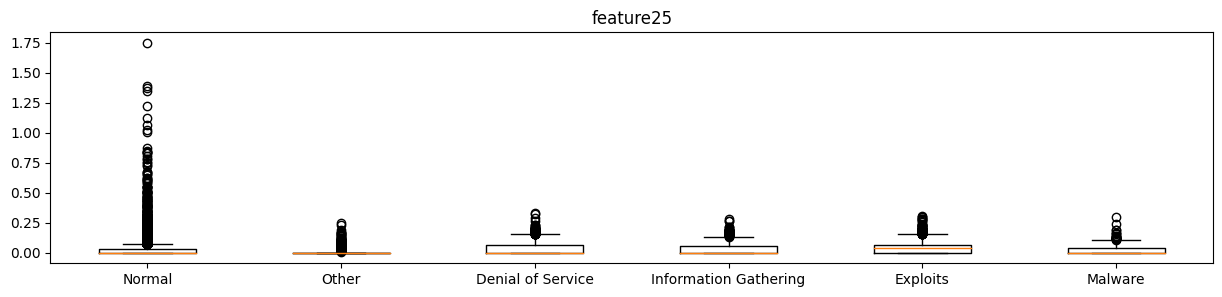

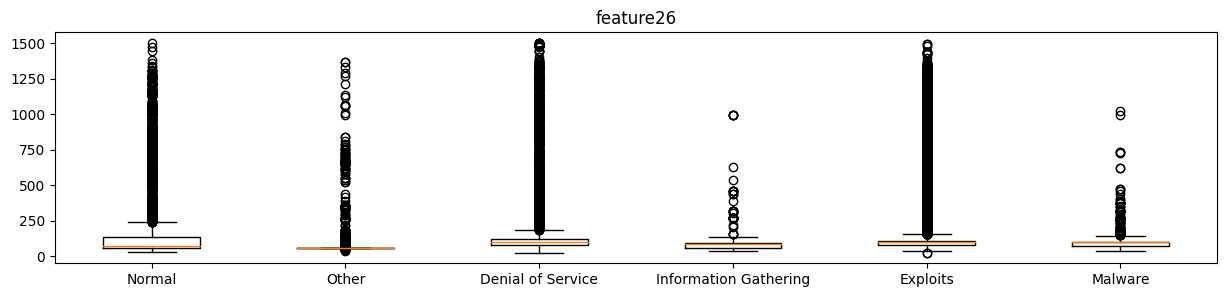

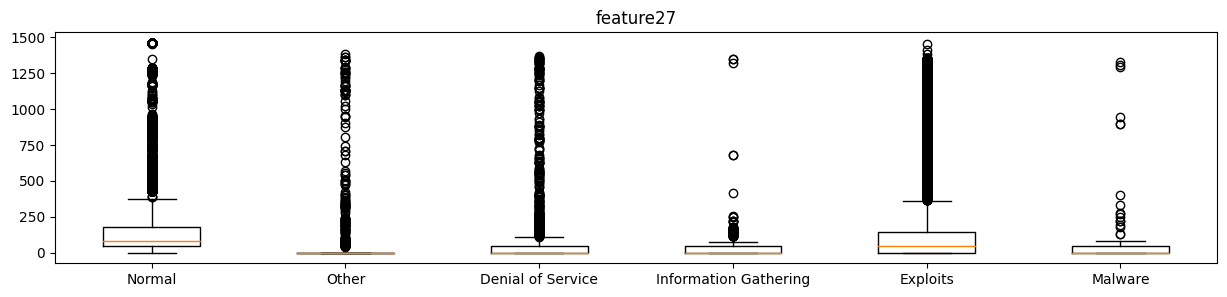

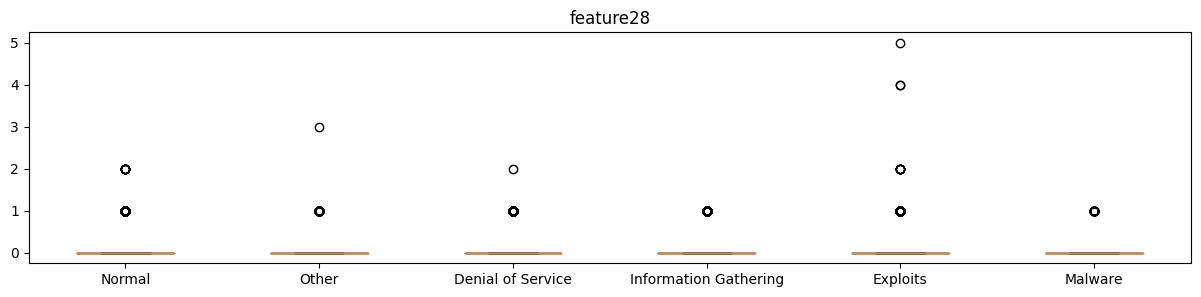

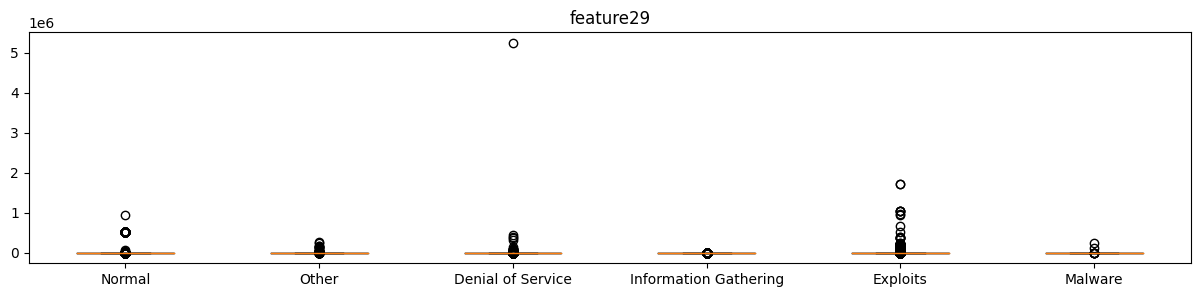

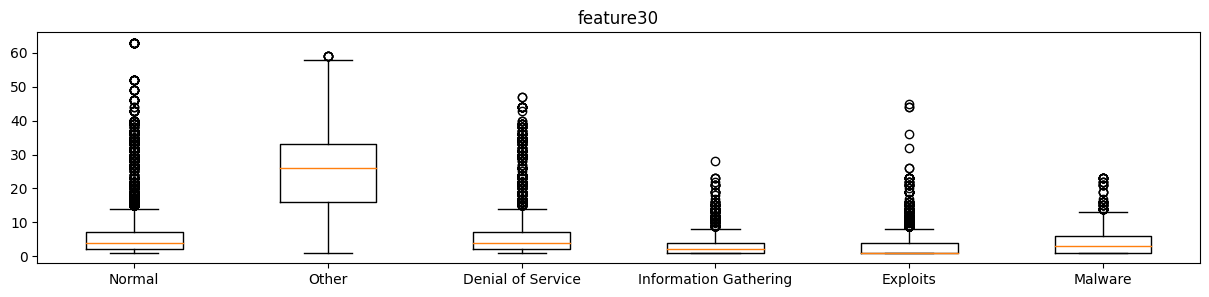

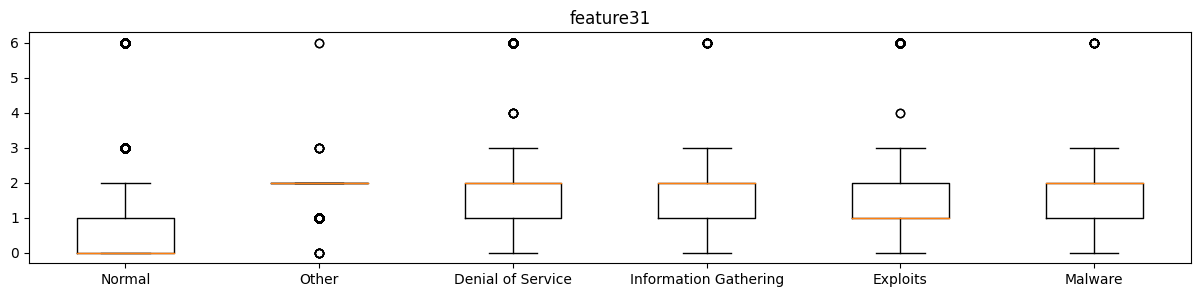

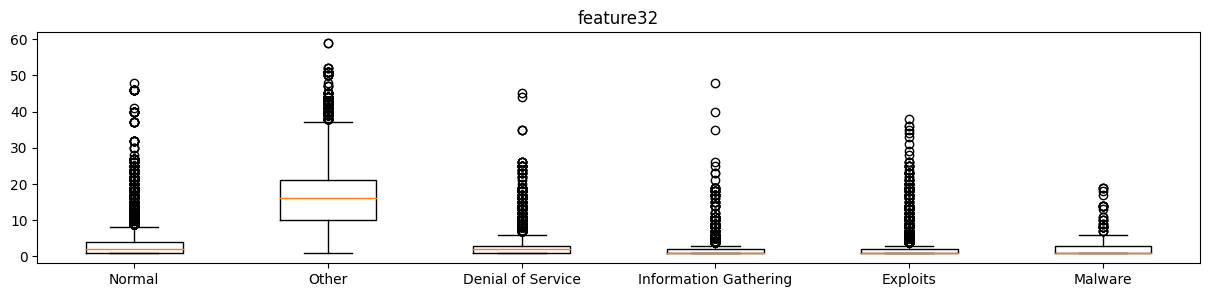

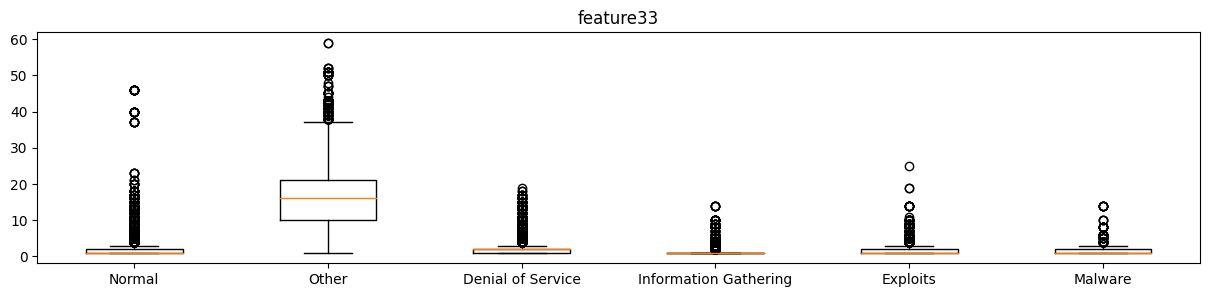

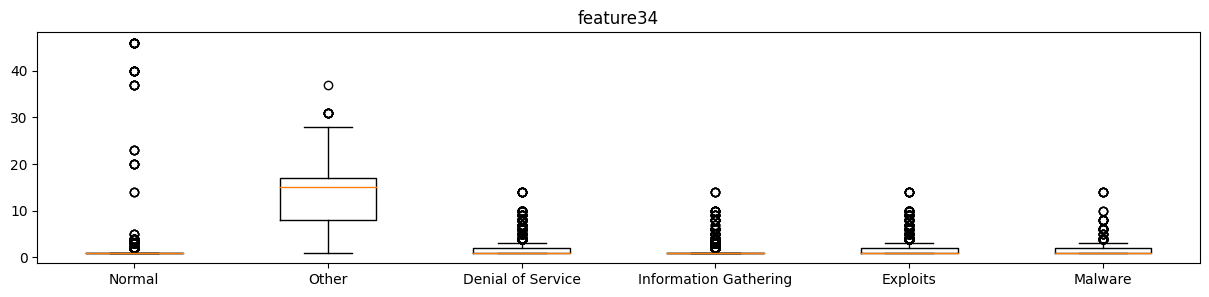

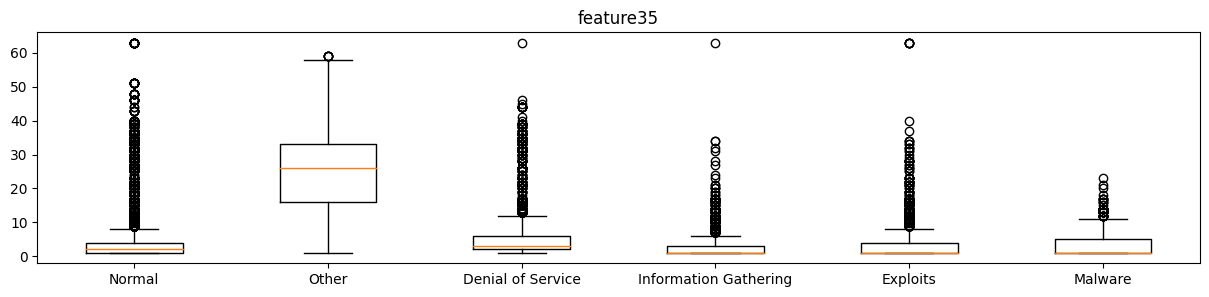

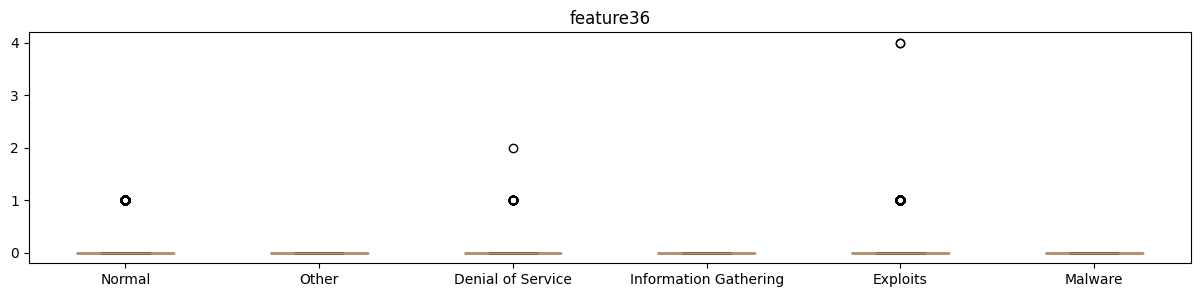

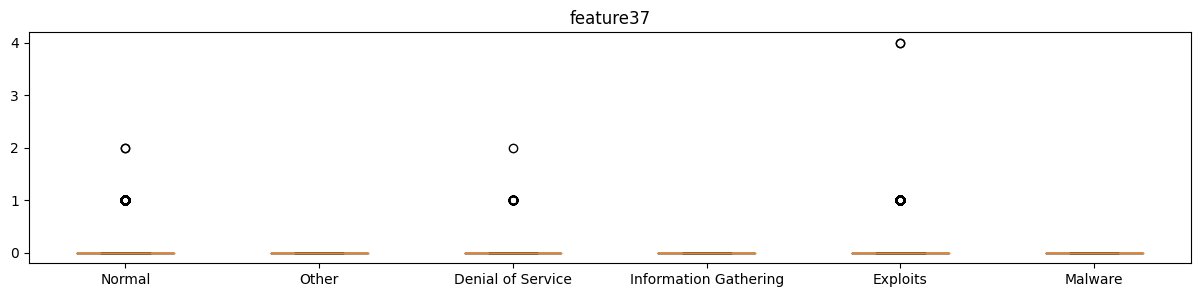

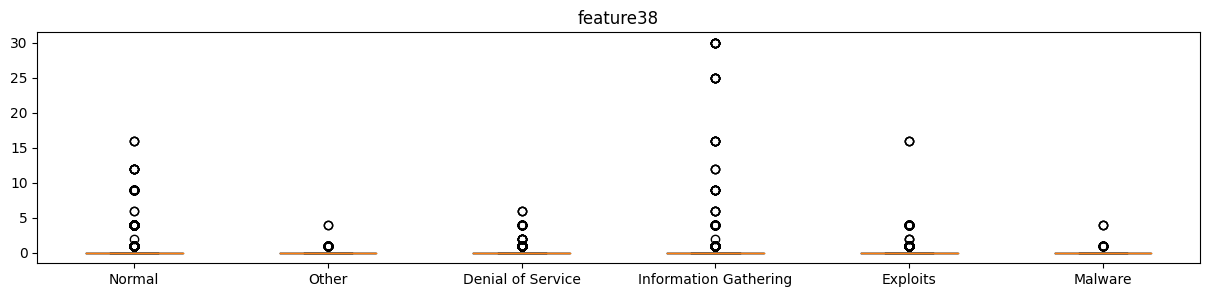

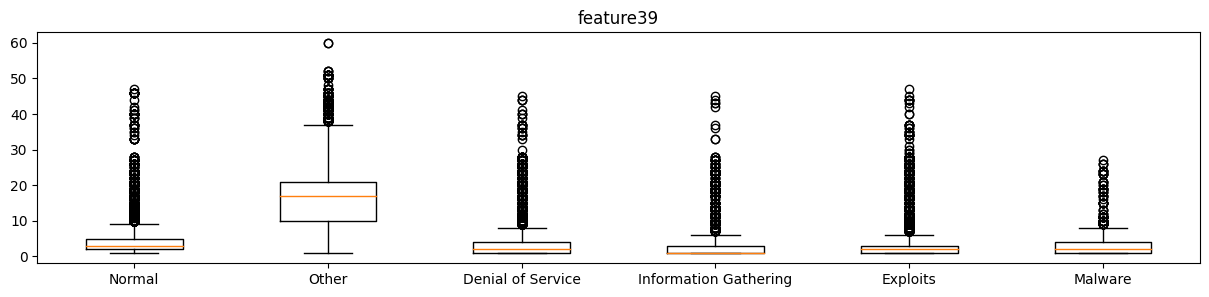

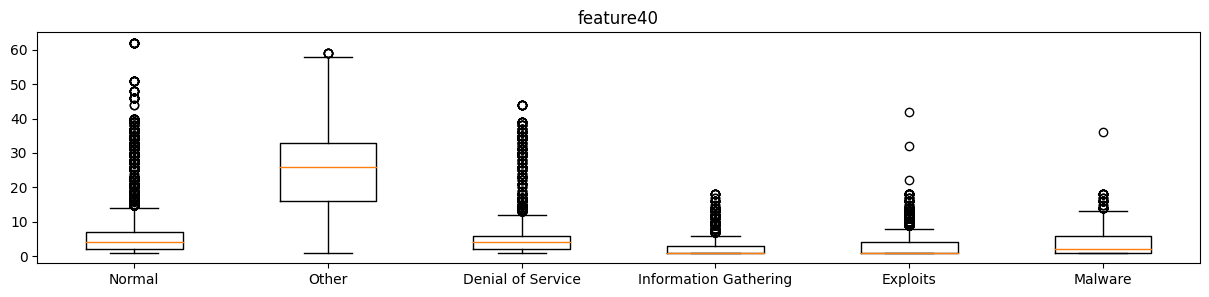

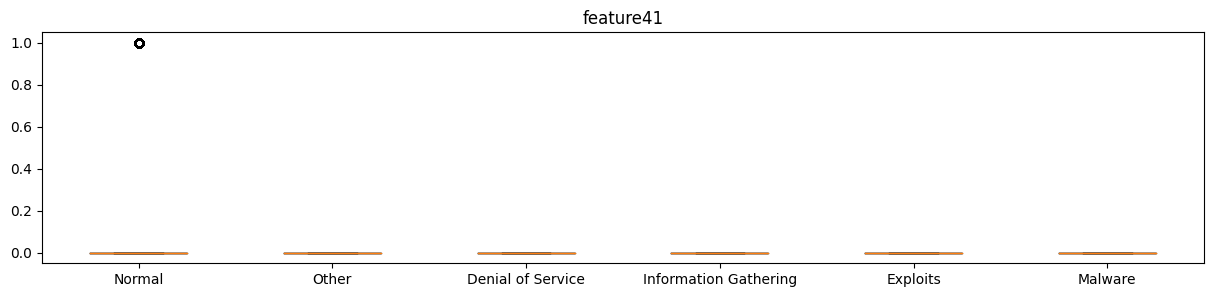

In [36]:
for col in df_numeric.columns:
    data = [df_numeric[col][series_label==label] for label in series_label.unique()]
    plt.figure(figsize=(15,3))
    plt.boxplot(data, labels=series_label.unique())
    plt.title(col)
    plt.show()

In [65]:
# zeros_median_columns = df_numeric.columns[df_numeric.median()==0]
# series_label[(df_numeric[zeros_median_columns]==0).all(axis=1)].value_counts()

In [73]:
# contingency_table

In [80]:
for cat_features in df_categorical.columns:
    contingency_table = df[[cat_features, 'label']].reset_index().groupby([cat_features,'label'])['index'].count().reset_index().pivot(index=cat_features, columns='label', values='index')
    contingency_table = contingency_table.apply(lambda x: x/x.sum(), axis=1).reindex(df_categorical[cat_features].value_counts().index)
    display(contingency_table.style.background_gradient(cmap='Oranges', axis=None))


label,Denial of Service,Exploits,Information Gathering,Malware,Normal,Other
feature2,,,,,,
tcp,0.151080,0.224355,0.062392,0.009937,0.545003,0.007233
udp,0.070260,0.010275,0.053180,0.009104,0.240705,0.616477
unas,0.404635,0.423015,0.115344,0.051145,nan,0.005860
arp,nan,nan,nan,nan,1.000000,nan
ospf,0.317955,0.502494,0.094763,0.042394,0.034913,0.007481
sctp,0.330189,0.500000,0.103774,0.044025,nan,0.022013
any,0.358696,0.445652,0.108696,0.086957,nan,nan
gre,0.418919,0.418919,0.121622,0.040541,nan,nan
ipv6,0.333333,0.527778,0.055556,0.069444,nan,0.013889


label,Denial of Service,Exploits,Information Gathering,Malware,Normal,Other
feature3,,,,,,
-,0.247864,0.167073,0.100079,0.026539,0.452162,0.006282
dns,0.007843,0.003615,0.000674,nan,0.153912,0.833956
http,0.102752,0.424465,0.098318,0.007798,0.351682,0.014985
smtp,0.057996,0.596368,0.002929,nan,0.327475,0.015231
ftp-data,0.003175,0.337302,nan,nan,0.659524,nan
ftp,0.179078,0.426418,nan,nan,0.392730,0.001773
pop3,0.036842,0.960526,nan,nan,nan,0.002632
ssh,nan,0.011561,nan,nan,0.985549,0.002890
dhcp,0.447368,0.447368,nan,nan,nan,0.105263


label,Denial of Service,Exploits,Information Gathering,Malware,Normal,Other
feature4,,,,,,
FIN,0.157678,0.234795,0.065436,0.010438,0.524090,0.007563
INT,0.175848,0.141848,0.078904,0.022775,0.088050,0.492576
CON,0.021452,0.036922,0.003094,0.003300,0.932343,0.002888
REQ,0.146421,0.125813,0.023861,0.014100,0.687636,0.002169
RST,0.100000,0.050000,0.050000,nan,0.800000,nan
ECO,nan,nan,nan,nan,1.000000,nan
ACC,nan,nan,nan,nan,1.000000,nan


=> Gop arp, igmp, icmp

=> Gop ECO, ACC